# Lang Graph

## Tools

### Wikipedia API Wrapper Tool (Summary from wikipedia)

In [5]:
from langchain_community.tools import WikipediaQueryRun

In [6]:
from langchain_community.utilities import WikipediaAPIWrapper

In [7]:
api_wrapper=WikipediaAPIWrapper(top_k_results=5,doc_content_chars_max= 500)

In [8]:
wiki_tool=WikipediaQueryRun(api_wrapper=api_wrapper)

In [9]:
wiki_tool.name

'wikipedia'

In [10]:
wiki_tool.description

'A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.'

In [11]:
wiki_tool.args

{'query': {'description': 'query to look up on wikipedia',
  'title': 'Query',
  'type': 'string'}}

In [12]:
wiki_tool.run({"query":"elon musk"})

"Page: Elon Musk\nSummary: Elon Reeve Musk ( EE-lon; born June 28, 1971) is a businessman. He is known for his leadership of Tesla, SpaceX, X (formerly Twitter), and the Department of Government Efficiency (DOGE). Musk has been considered the wealthiest person in the world since 2021; as of May 2025, Forbes estimates his net worth to be US$424.7 billion. \nBorn to a wealthy family in Pretoria, South Africa, Musk emigrated in 1989 to Canada. He received bachelor's degrees from the University of Penn"

In [13]:
wiki_tool.run("RCB")

c:\Users\saina\.conda\envs\agentic_base\Lib\site-packages\wikipedia\wikipedia.py:389: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 389 of the file c:\Users\saina\.conda\envs\agentic_base\Lib\site-packages\wikipedia\wikipedia.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  lis = BeautifulSoup(html).find_all('li')


"Page: Royal Challengers Bengaluru\nSummary: The Royal Challengers Bengaluru, formerly Royal Challengers Bangalore, also known as RCB, are a professional Twenty20 cricket team based in Bengaluru, Karnataka, that competes in the Indian Premier League (IPL). Founded in 2008 by United Spirits, the team's home ground is M. Chinnaswamy Stadium. They won their first title in 2025. The team finished as the runners-up on three occasions: in 2009, 2011, and 2016. They have also qualified for the playoffs i"

### Youtube Search Tool

In [14]:
from langchain_community.tools import YouTubeSearchTool

In [15]:
tool=YouTubeSearchTool()

In [16]:
tool.name

'youtube_search'

In [17]:
tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [18]:
tool.run("Agentic AI")

"['https://www.youtube.com/watch?v=Jj1-zb38Yfw&pp=ygUKQWdlbnRpYyBBSQ%3D%3D', 'https://www.youtube.com/watch?v=dIb-DujRNEo&pp=ygUKQWdlbnRpYyBBSQ%3D%3D']"

### Tavily Search Tool

In [19]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [20]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [21]:
import os
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")

In [22]:
tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

C:\Users\saina\AppData\Local\Temp\ipykernel_1796\1068719361.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)


In [23]:
tool.invoke({"query":"what happend in RCB victory celebration?"})

[{'title': "Bengaluru stampede case: What we know so far on RCB's ...",
  'url': 'https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/bengaluru-stampede-case-what-we-know-so-far-on-rcbs-celebrations-that-turned-catastrophic/articleshow/121670873.cms',
  'content': "[Follow us](https://news.google.com/publications/CAAqBwgKMM6y_Qowwu70Ag)\n\nRoyal Challengers Bengaluru's IPL victory celebrations turned tragic as a stampede at M Chinnaswamy Stadium resulted in 11 deaths and 75 injuries. FIRs have been filed against RCB, events organisers DNA, and Karnataka State Cricket Association for alleged negligence. The Karnataka High Court has sought a report from the government while arrests have been and officials suspended.\n\nRead More [...] [](https://timesofindia.indiatimes.com/city/bengaluru/celebrations-turn-tragic-bloodbath-at-rcbs-maiden-ipl-trophy-victory-day-to-remember-forever-see-pics/photostory/121646177.cms)[Celebrations turn tragic: Bloodbath at RCB’s maiden IPL trop

### Custom tool

In [24]:
def multiply(a:int,b:int)->int:
    return a*b

In [25]:
multiply(10,20)

200

In [26]:
# multiply.run(10,20)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[52], line 1
----> 1 multiply.run(10,20)

AttributeError: 'function' object has no attribute 'run'

In [27]:
# multiply.invoke(10,20)

---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
Cell In[53], line 1
----> 1 multiply.invoke(10,20)

AttributeError: 'function' object has no attribute 'invoke'

In [28]:
from langchain.agents import tool
@tool
def multiply(a:int,b:int)->int:
    '''this tool is for the multiplication'''
    return a*b

In [29]:
multiply.invoke({"a":10,"b":20})

200

In [30]:
multiply.name

'multiply'

In [31]:
multiply.description

'this tool is for the multiplication'

In [32]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [33]:
def get_word_length(word:str)->int:
    return len(word)

In [34]:
get_word_length("Sainadh bahadursha")

18

In [35]:
get_word_length("narendra modi")

13

In [36]:
@tool
def get_word_length(word:str)->int:
    """this function is calculating a length of the word"""
    return len(word)

In [37]:
get_word_length.name

'get_word_length'

In [38]:
get_word_length.description

'this function is calculating a length of the word'

In [39]:
get_word_length.args

{'word': {'title': 'Word', 'type': 'string'}}

In [40]:
get_word_length("sainadh")

C:\Users\saina\AppData\Local\Temp\ipykernel_1796\1704822211.py:1: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  get_word_length("sainadh")


7

In [41]:
get_word_length.invoke("sainadh")

7

### Gmail tool

In [42]:
# @tool
# def call_gmail_api(args):
#     """this is my gmail api calling funtion"""
#     pass

In [43]:
# from langchain.agents import tool
# import os
# import base64
# from email import message_from_bytes
# from google.auth.transport.requests import Request
# from google.oauth2.credentials import Credentials
# from google_auth_oauthlib.flow import InstalledAppFlow
# from googleapiclient.discovery import build

# SCOPES = ['https://www.googleapis.com/auth/gmail.readonly']
# from langchain.tools import tool
# from pydantic import BaseModel, Field

# class GmailArgs(BaseModel):
#     max_results: int = Field(..., description="Number of unread emails to fetch")

# @tool
# def call_gmail_api(args: GmailArgs) -> str:
#     """
#     Reads unread emails from Gmail inbox using Gmail API.
#     Args:
#         max_results (int): Maximum number of unread emails to fetch. Default is 5.
#     Returns:
#         A string summary of unread emails.
#     """
#     max_results = args.max_results

#     try:
#         creds = None
#         if os.path.exists('token.json'):
#             creds = Credentials.from_authorized_user_file('token.json', SCOPES)
#         if not creds or not creds.valid:
#             if creds and creds.expired and creds.refresh_token:
#                 creds.refresh(Request())
#             else:
#                 flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
#                 creds = flow.run_local_server(port=0)
#             with open('token.json', 'w') as token:
#                 token.write(creds.to_json())

#         service = build('gmail', 'v1', credentials=creds)
#         results = service.users().messages().list(userId='me', labelIds=['INBOX', 'UNREAD'], maxResults=max_results).execute()
#         messages = results.get('messages', [])

#         if not messages:
#             return "No unread emails found."

#         summaries = []
#         for msg in messages:
#             msg_data = service.users().messages().get(userId='me', id=msg['id']).execute()
#             headers = msg_data['payload']['headers']
#             subject = next((h['value'] for h in headers if h['name'] == 'Subject'), '(No Subject)')
#             sender = next((h['value'] for h in headers if h['name'] == 'From'), '(Unknown Sender)')
#             snippet = msg_data.get('snippet', '')
#             summaries.append(f"From: {sender}\nSubject: {subject}\nSnippet: {snippet}")

#         return "\n\n".join(summaries)

#     except Exception as e:
#         return f"Error accessing Gmail API: {e}"

# # @tool
# # def call_gmail_api(max_results: int = 5) -> str:
# #     """
# #     Reads unread emails from Gmail inbox using Gmail API.
# #     Args:
# #         max_results (int): Maximum number of unread emails to fetch. Default is 5.
# #     Returns:
# #         A string summary of unread emails.
# #     """
# #     try:
# #         creds = None
# #         if os.path.exists('token.json'):
# #             creds = Credentials.from_authorized_user_file('token.json', SCOPES)
# #         if not creds or not creds.valid:
# #             if creds and creds.expired and creds.refresh_token:
# #                 creds.refresh(Request())
# #             else:
# #                 flow = InstalledAppFlow.from_client_secrets_file('credentials.json', SCOPES)
# #                 creds = flow.run_local_server(port=0)
# #             with open('token.json', 'w') as token:
# #                 token.write(creds.to_json())

# #         service = build('gmail', 'v1', credentials=creds)
# #         results = service.users().messages().list(userId='me', labelIds=['INBOX', 'UNREAD'], maxResults=max_results).execute()
# #         messages = results.get('messages', [])

# #         if not messages:
# #             return "No unread emails found."

# #         summaries = []
# #         for msg in messages:
# #             msg_data = service.users().messages().get(userId='me', id=msg['id']).execute()
# #             headers = msg_data['payload']['headers']
# #             subject = next((h['value'] for h in headers if h['name'] == 'Subject'), '(No Subject)')
# #             sender = next((h['value'] for h in headers if h['name'] == 'From'), '(Unknown Sender)')
# #             snippet = msg_data.get('snippet', '')
# #             summaries.append(f"From: {sender}\nSubject: {subject}\nSnippet: {snippet}")

# #         return "\n\n".join(summaries)

# #     except Exception as e:
# #         return f"Error accessing Gmail API: {e}"



In [44]:
# # from langchain.agents import initialize_agent
# # from langchain.agents.agent_types import AgentType
# # from langchain.chat_models import ChatOpenAI

# # # Register the tool
# # tools = [call_gmail_api]

# # llm = ChatOpenAI(model="gpt-3.5-turbo")

# # agent = initialize_agent(
# #     tools=tools,
# #     llm=llm,
# #     agent_type=AgentType.OPENAI_FUNCTIONS,
# #     verbose=True,
# # )

# # # Example query
# # response = agent.run("Read my last 3 unread emails.")
# # print(response)

# from langchain.agents import initialize_agent, AgentType
# from langchain.chat_models import ChatOpenAI

# tools = [call_gmail_api]
# llm = ChatOpenAI(model="gpt-3.5-turbo")

# agent = initialize_agent(
#     tools=tools,
#     llm=llm,
#     agent_type=AgentType.OPENAI_FUNCTIONS,  # Requires structured input
#     verbose=True,
# )

# # Test
# response = agent.run("Get my last 3 unread emails.")
# print(response)


## Langgraph Intro 1

In [45]:
def function1(input1):
    return input1 + " from first function"

In [46]:
def function2(input2):
    return input2 + " Bahadursha from second function"

In [47]:
def function3(input3):
    pass

In [48]:
function1("Sainadh")

'Sainadh from first function'

In [49]:
function2("Bahadursha")

'Bahadursha Bahadursha from second function'

In [50]:
from langgraph.graph import Graph

In [51]:
workflow1 = Graph()

In [52]:
workflow1.add_node("fun1",function1)

In [53]:
workflow1.add_node("fun2",function2)

In [54]:
workflow1.add_edge("fun1","fun2")

In [55]:
workflow1.set_entry_point("fun1")

In [56]:
workflow1.set_finish_point("fun2")

In [57]:
app = workflow1.compile()

In [58]:
from IPython.display import Image, display

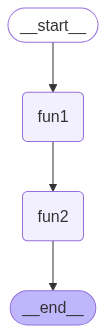

In [59]:
display(Image(app.get_graph().draw_mermaid_png()))

In [60]:
app.invoke("Hi this is Sainadh")

'Hi this is Sainadh from first function Bahadursha from second function'

In [61]:
for output in app.stream("hi this is Sainadh"):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("___________")
        print(value)
        print("\n")

here is output from fun1
___________
hi this is Sainadh from first function


here is output from fun2
___________
hi this is Sainadh from first function Bahadursha from second function




In [62]:
def llm(input):
    from langchain_google_genai import ChatGoogleGenerativeAI
    model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
    output=model.invoke(input)
    return output.content

In [63]:
def token_counter(input):
    token=input.split()
    token_number=len(token)
    return f"total token number in the generated answer is {token_number}"

In [64]:
workflow2 = Graph()

In [65]:
workflow2.add_node("My_LLM",llm)

In [66]:
workflow2.add_node("LLM_Output_Token_Counter",token_counter)

In [67]:
workflow2.add_edge("My_LLM","LLM_Output_Token_Counter")

In [68]:
workflow2.set_entry_point("My_LLM")

In [69]:
workflow2.set_finish_point("LLM_Output_Token_Counter")

In [70]:
app=workflow2.compile()

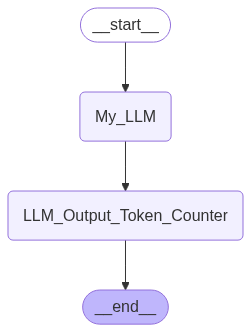

In [71]:
display(Image(app.get_graph().draw_mermaid_png()))

In [75]:
from dotenv import load_dotenv
load_dotenv()

True

In [76]:
app.invoke("can you tell me about the india's capital?")

'total token number in the generated answer is 68'

In [77]:
app.invoke("tell me about the tata enterpirse in very detail.")

'total token number in the generated answer is 667'

In [78]:
for output in app.stream("tell me about the tata enterpirse in very detail."):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from My_LLM
_______
Tata Enterprises, more accurately referred to as the **Tata Group**, is a massive Indian multinational conglomerate headquartered in Mumbai, Maharashtra.  It's not a single entity but a network of over 100 operating companies, spanning diverse sectors and employing millions of people globally.  Understanding its complexity requires looking at several key aspects:

**I. History and Structure:**

* **Origins:** The group traces its roots back to 1868 when Jamsetji Tata founded the Tata & Sons trading company.  His vision extended beyond profit, encompassing social responsibility and nation-building, a philosophy that continues to define the group.
* **Structure:**  The Tata Group isn't a typical corporation.  It's a complex web of independent companies, many publicly listed, held together by a shared philosophy and the overarching influence of Tata Sons, the holding company.  Tata Sons owns substantial stakes in many group companies, but doesn't directl

## Langgraph Intro 2

### Config the model

In [ ]:
# from langchain_google_genai import ChatGoogleGenerativeAI
# model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
# output=model.invoke("hi")
# print(output.content)

### Config the embedding model

In [ ]:
# from langchain_huggingface import HuggingFaceEmbeddings
# embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
# len(embeddings.embed_query("hi"))

### lets take a data embedd it and store in VDB

In [ ]:
# from langchain_community.document_loaders import TextLoader, DirectoryLoader
# from langchain_community.vectorstores import Chroma
# from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
# loader=DirectoryLoader("data",glob="./*.txt",loader_cls=TextLoader)

In [ ]:
# docs=loader.load()

In [ ]:
# docs

In [ ]:
# docs[0].page_content

In [ ]:
# text_splitter=RecursiveCharacterTextSplitter(
#     chunk_size=200,
#     chunk_overlap=50
# )

In [ ]:
# new_docs=text_splitter.split_documents(documents=docs)

In [ ]:
# new_docs

In [ ]:
# doc_string=[doc.page_content for doc in new_docs]

In [ ]:
# doc_string

In [ ]:
# len(doc_string)

In [ ]:
# db=Chroma.from_documents(new_docs[:5],embeddings)

In [ ]:
# retriever=db.as_retriever(search_kwargs={"k": 3})

In [ ]:
# retriever.invoke("industrial growth of usa?")

## Lang graph Intro 3

In [79]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END

In [80]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [81]:
from langchain.output_parsers import PydanticOutputParser

In [82]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [83]:
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [84]:
'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

### this below agentstate is just for the explnation like how state works

In [85]:
Agentstate={}

In [86]:
Agentstate["messages"]=[]

In [87]:
Agentstate

{'messages': []}

In [88]:
Agentstate["messages"].append("hi how are you?")

In [89]:
Agentstate

{'messages': ['hi how are you?']}

In [90]:
Agentstate["messages"].append("what are you doing?")

In [91]:
Agentstate

{'messages': ['hi how are you?', 'what are you doing?']}

In [92]:
Agentstate["messages"].append("i hope everything fine")

In [93]:
Agentstate


{'messages': ['hi how are you?',
  'what are you doing?',
  'i hope everything fine']}

In [94]:
Agentstate["messages"][-1]

'i hope everything fine'

In [95]:
Agentstate["messages"][0]

'hi how are you?'

### this agentstate class you need to inside the stategraph

In [96]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [97]:
state={"messages":["hi"]}

In [98]:
state="hi"

In [99]:
def function_1(state:AgentState):
    
    question=state["messages"][-1]
    
    print("Question",question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [USA,Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )
    
    
    chain= prompt | model | parser
    
    response = chain.invoke({"question":question})
    
    print("Parsed response:", response)
    
    return {"messages": [response.Topic]}

In [100]:
state={"messages":["what is a today weather?"]}

In [101]:
state={"messages":["what is a GDP of usa??"]}

In [103]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

Hi there! How can I help you today?


In [104]:
function_1(state)

Question what is a GDP of usa??
Parsed response: Topic='USA' Reasoning='The query explicitly asks about the GDP of the USA.'


{'messages': ['USA']}

In [105]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [106]:
def router(state:AgentState):
    print("-> ROUTER ->")
    
    last_message=state["messages"][-1]
    print("last_message:", last_message)
    
    if "usa" in last_message.lower():
        return "RAG Call"
    else:
        return "LLM Call"

In [107]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [108]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")
    
    question = state["messages"][0]
    
    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",
        
        input_variables=['context', 'question']
    )
    
    rag_chain = (
        {"context": retriever | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [109]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]
    
    # Normal LLM call
    complete_query = "Anwer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [110]:
from langgraph.graph import StateGraph,END

In [111]:
workflow=StateGraph(AgentState)

In [112]:
workflow.add_node("Supervisor",function_1)

In [113]:
workflow.add_node("RAG",function_2)

In [114]:
workflow.add_node("LLM",function_3)

In [115]:
workflow.set_entry_point("Supervisor")

In [116]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

In [117]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM",END)

In [118]:
app=workflow.compile()

In [119]:
state={"messages":["hi"]}

In [120]:
app.invoke(state)

Question hi
Parsed response: Topic='Not Related' Reasoning="The query 'hi' is a generic greeting and does not contain any information related to the USA."
-> ROUTER ->
last_message: Not Related
-> LLM Call ->


{'messages': ['hi', 'Not Related', 'Hi there!  How can I help you today?']}

In [121]:
state={"messages":["what is a gdp of usa?"]}

In [122]:
app.invoke(state)

Question what is a gdp of usa?
Parsed response: Topic='USA' Reasoning='The query explicitly asks for the GDP of the USA.'
-> ROUTER ->
last_message: USA
-> RAG Call ->


NameError: name 'retriever' is not defined

## Langgraph Agent

### Config the model

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
model=ChatGoogleGenerativeAI(model='gemini-1.5-flash')
output=model.invoke("hi")
print(output.content)

### Config the embedding model

In [ ]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="BAAI/bge-small-en")
len(embeddings.embed_query("hi"))

### Creating the agent

In [ ]:
import operator
from typing import List
from pydantic import BaseModel , Field
from langchain.prompts import PromptTemplate
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate, PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,END, START
from langchain.output_parsers import PydanticOutputParser
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS


In [ ]:
class TopicSelectionParser(BaseModel):
    Topic:str=Field(description="selected topic")
    Reasoning:str=Field(description='Reasoning behind topic selection')

In [ ]:
parser=PydanticOutputParser(pydantic_object=TopicSelectionParser)
parser.get_format_instructions()

In [ ]:
class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [ ]:
def function_1(state:AgentState):

    question=state["messages"][-1]

    print("Question",question)

    template="""
    Your task is to classify the given user query into one of the following related categories: [Constitution,LLM, Latest]. If question is about
    Indian constitution then Constitution, if question is generic then LLM and if question is about some recent thing which you don't know then Latest.
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """

    prompt= PromptTemplate(
        template=template,
        input_variable=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )


    chain= prompt | model | parser


    response = chain.invoke({"question":question})

    print("Parsed response:", response)

    return {"messages": [response.Topic]}

In [ ]:
def router(state:AgentState):
    print("-> ROUTER ->")

    last_message=state["messages"][-1]
    print("last_message:", last_message)

    if "constitution" in last_message.lower():
        return "RAG Call"
    elif "latest" in last_message.lower():
        return "WEB Call"
    else:
        return "LLM Call"

In [ ]:
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

In [ ]:
# Load a PDF and validate the page count
file_path = r"C:\Users\saina\Desktop\DS_ML_AI\Krish_Naik_Courses\Krish_naik_1_Agentic_AI_and_Gen_AI\Practice\agentic_ai_2\data\2023050195.pdf"
loader = PyPDFLoader(file_path)
pages = loader.load()

if len(pages) < 200:
    raise ValueError("The PDF must have at least 200 pages.")

#Using semantic chunking with recursive text splitter
text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=100)
chunks = text_splitter.split_documents(pages)


# Hugging Face embedding
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

faiss_flat = FAISS.from_documents(chunks, embedding_model)
retriever_flat = faiss_flat.as_retriever()

In [ ]:
# RAG Function
def function_2(state:AgentState):
    print("-> RAG Call ->")

    question = state["messages"][0]

    prompt=PromptTemplate(
        template="""You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.\nQuestion: {question} \nContext: {context} \nAnswer:""",

        input_variables=['context', 'question']
    )

    rag_chain = (
        {"context": retriever_flat | format_docs, "question": RunnablePassthrough()}
        | prompt
        | model
        | StrOutputParser()
    )
    result = rag_chain.invoke(question)
    return  {"messages": [result]}

In [ ]:
# LLM Function
def function_3(state:AgentState):
    print("-> LLM Call ->")
    question = state["messages"][0]

    # Normal LLM call
    complete_query = "Answer the follow question with you knowledge of the real world. Following is the user question: " + question
    response = model.invoke(complete_query)
    return {"messages": [response.content]}

In [ ]:
from langchain_community.tools import DuckDuckGoSearchRun
def search_fun(state:AgentState):
    search=DuckDuckGoSearchRun()
    result = search.invoke({"query":state["messages"][0]})
    return {"messages": [result]}


In [ ]:
def function_4(state:AgentState):

    question = state["messages"][0]
    answer=state["messages"][-1]

    print("answer",answer)

    template="""
    Your task is to check if the response is related to the user question.
    Only respond with yes or no and nothing else.

    User query: {question}
    response: {answer}
    {format_instructions}
    """

    prompt= PromptTemplate(
        template=template,
        input_variable=["question","answer"],
        partial_variables={"format_instructions": parser.get_format_instructions()}
    )


    chain= prompt | model | parser

    response = chain.invoke({"question":question,"answer":answer})

    print("Parsed response:", response)

    return {"messages": [response.Topic]}

In [ ]:
def router_1(state:AgentState):
    print("-> ROUTER_1 ->")

    last_message=state["messages"][-1]
    print("last_message:", last_message)

    if "yes" in last_message.lower():
        return "yes"
    else:
        return "no"

In [ ]:
workflow=StateGraph(AgentState)
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG",function_2)
workflow.add_node("LLM",function_3)
workflow.add_node("WEB", search_fun)
workflow.add_node("VALIDATION",function_4)
workflow.set_entry_point("Supervisor")

In [ ]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
        "WEB Call": "WEB",
    }
)

In [ ]:
workflow.add_edge("RAG","VALIDATION")
workflow.add_edge("LLM","VALIDATION")
workflow.add_edge("WEB","VALIDATION")

workflow.add_conditional_edges(
    "VALIDATION",
    router_1,
    {
        "yes": END,
        "no":"Supervisor"
    }

)

In [ ]:
app=workflow.compile()

In [ ]:
from IPython.display import Image, display
display(Image(app.get_graph(xray=True).draw_mermaid_png()))

In [ ]:
state={"messages":["How to make black tea?, list down in simple steps"]}
app.invoke(state)

In [ ]:
state={"messages":["List all the fundamental duties?"]}
app.invoke(state)

In [ ]:
state={"messages":["what is the net worth of Elon Musk"]}
app.invoke(state)

# Last